# Explore Fantasy Football Data <a id="return"></a>

This notebook will explore the web-scraped data from the ESPN Raytonia Beach Fantasy Football League.
<br><br/>

**Notebook Sections:**
1. [Import Packages and Set User-Defined Fields](#section1)
2. [Read in Data](#section2)
3. [Explore Overall Data](#section3)
4. [Explore Numerical Data](#section4)
    1. [Explore Numerical Distributions](#section4a)
    2. [Explore Numerical Correlations](#section4b)
5. [Explore Categorical Data](#section5)
    1. [Explore Categorical Relationships](#section5a)
6. [Explore Numerical/Categorical Relationships](#section6)
7. [Explore Date Distributions](#section7)
<br><br/>

**Outputs:**
1. Summary of Overall Data: **csv**
2. Summary of Numerical Data: **csv**
    1. Histogram Plot(s): **pdf**
    2. Heatmap Plot: **pdf** and/or **csv**
3. Summary of Categorical Data: **csv**
    1. Summary of Categorical Relationships Tests: **csv**
    2. Heatmap Plots: **pdf** or **csv**
4. Summary of Numerical/Categorical Relationships Test: **csv**
5. Date Distribution Plot(s): **pdf**

## Import Packages <a id="section1"></a>

In [11]:
# import packages to create/manipulate dataframes
import pandas as pd
import numpy as np

# import package for interacting with operating system
import os

# import package to create database connection
import psycopg2


# run the 01-explore_ff_league_data_util.ipynb notebook
%run 01-explore_ff_league_data_util.ipynb

## Set User-Defined Fields

[Return to Top](#return)

In [23]:
# set print flag to True to print output within this notebook or set to False to save output to flat files
print_flag = True

# if False then create an data output directory
if not print_flag:
    
    # set output directory
    output_dir = '../data/data_exploration/'

    # create directory if it doesn't exist
    if not os.path.exists(output_dir): 
        os.makedirs(output_dir)
    
# set data directory; set to None if not using
data_dir = '../data/'

# set file name of data to explore; set to None if not using
file_name = 'matchups_df_all.pkl'

# if there's a data directory then create full file path to data plus file name
if data_dir:

    # set full file path to data plus file name
    file_path = data_dir + file_name
    
else:
    file_path = None

# set database schema name; set to None if not using
schema_name = None

# set database table name of data to explore; set to None if not using
table_name = None

# if schema name exists then set DB path to data as well as DB connection settings
if schema_name:
    
    # set full database path to data plus table name if schema name exists
    db_path = schema_name + '.' + table_name
    
    # set database name
    db_name = "tkgafrwp"
    
    # set user name
    db_user = "tkgafrwp"
    
    # set user password
    db_pass = "iYYtLAXVbid-i6MV3NO1EnU-_9SW2uEi"
    
    # set host name
    db_host = "tyke.db.elephantsql.com"
    
    # set port number
    db_port = "5432"
    
else:
    db_path = None
    
# create data name tuple
data_name_tuple = (True, file_name) if file_path else (False, table_name)

## Read in Data <a id="section2"></a>
[Return to Top](#return)

In [4]:
# set database connection if schema name exists
if schema_name:
    
    # try database connection
    try:
        
        # create database connection object
        db_conn = psycopg2.connect(database = db_name
                                  ,user = db_user
                                  ,password = db_pass
                                  ,host = db_host
                                  ,port = db_port
                                  )
        
        # print success message
        print("Database connected successfully")
    except:
        
        # print failure message
        print("Database not connected successfully")

In [5]:
# run read data function
df = read_data(file_path = file_path) if file_path else read_data(db_path = db_path, db_conn = db_conn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 648 non-null    int64  
 1   week                 648 non-null    int64  
 2   owner_team_name      648 non-null    object 
 3   owner                648 non-null    object 
 4   score                648 non-null    float64
 5   win                  648 non-null    int64  
 6   opp_owner_team_name  648 non-null    object 
 7   opp_owner            648 non-null    object 
 8   opp_score            648 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 45.7+ KB


None

In [4]:
# check for full file path to data 
if file_path:
    
    # run read_data function
    df = read_data(file_path = file_path)
        
# check for full database path to data    
if db_path:
    
    # run read_data function
    df = read_data(db_path = db_path, db_conn = db_conn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 648 non-null    int64  
 1   week                 648 non-null    int64  
 2   owner_team_name      648 non-null    object 
 3   owner                648 non-null    object 
 4   score                648 non-null    float64
 5   win                  648 non-null    int64  
 6   opp_owner_team_name  648 non-null    object 
 7   opp_owner            648 non-null    object 
 8   opp_score            648 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 45.7+ KB


None

## Explore Overall Data <a id="section3"></a>

This section will review the following:
* Row Count
* Column Count
* Total Percentage Null
* Total Percentage Empty
* Total Percentage Zero
* Total Percentage Negative
* Total Percentage Positive
* Data Type Counts

[Return to Top](#return)

In [10]:
# create data name tuple
data_name_tuple = (True, file_name) if file_path else (False, table_name)

# run explore all data function
explore_all_data(data = df, print_flag = print_flag) if print_flag else explore_all_data(data = df
                                                                                        ,file_name_flag = data_name_tuple[0]
                                                                                        ,data_name_var = data_name_tuple[1]
                                                                                        ,output_dir = output_dir
                                                                                        )

In [5]:
# check for file name
if file_path:
    
    # check for print flag
    if print_flag:
            
        # run data exploration function
        explore_all_data(data = df, print_flag = print_flag)
            
    else:
            
        # set file name flag to True; needed to help create output file name
        file_name_flag = True

        # run data exploration function
        explore_all_data(data = df, file_name_flag = file_name_flag, data_name_var = file_name, output_dir = output_dir)
            
if db_path:
        
    # check for print flag
    if print_flag:
            
        # run data exploration function
        explore_all_data(data = df, print_flag = print_flag)
            
    else:
            
        # set file name flag to False; needed to help create output file name
        file_name_flag = False

        # run data exploration function
        explore_all_data(data = df, file_name_flag = file_name_flag, data_name_var = table_name, output_dir = output_dir)

## Explore Numerical Data <a id="section4"></a>

This section will review the following:
* Row count
* Number of distinct values
* 5-number summary
* Mean
* Standard Deviation
* Sum of all values
* Percentage null
* Percentage zero
* Percentage positive
* Percentage negative
* Top n most frequent values
* First n values when sorted
* Last n values when sorted

[Return to Top](#return)

In [14]:
# run data exploration function and pass it the numerical data exploration function
run_explore_func(data = df, func = explore_num_data, print_flag = print_flag) if print_flag else run_explore_func(data = df
                                                                                                                 ,func = explore_num_data
                                                                                                                 ,file_name_flag = data_name_tuple[0]
                                                                                                                 ,data_name_var = data_name_tuple[1]
                                                                                                                 ,output_dir = output_dir
                                                                                                                 )

Summary:



summary,row_count,dist_num,min,25%,50%,75%,max,mean,std,total_sum,null_perc,zero_perc,pos_perc,neg_perc
year,648.0,4.0,2018.0,2019.00,2020.0,2021.00,2021.0,2019.519,1.124,1.309e+06,0.0,0.00,100.00,0.0
week,648.0,17.0,1.0,5.00,9.0,13.00,17.0,8.611,4.690,5.580e+03,0.0,0.00,100.00,0.0
score,648.0,502.0,40.6,121.15,140.1,166.15,263.0,142.875,32.431,9.258e+04,0.0,0.00,100.00,0.0
win,648.0,2.0,0.0,0.00,0.0,1.00,1.0,0.454,0.498,2.940e+02,0.0,54.63,45.37,0.0
opp_score,648.0,502.0,40.6,121.15,140.1,166.15,263.0,142.875,32.431,9.258e+04,0.0,0.00,100.00,0.0



Most Frequent n Values:



,year,count,freq
,2021,168,0.259
,2018,160,0.247
,2019,160,0.247
,2020,160,0.247


,week,count,freq
,1,40,0.062
,2,40,0.062
,16,40,0.062
,14,40,0.062
,13,40,0.062


,score,count,freq
,151.8,5,0.008
,134.5,4,0.006
,169.4,4,0.006
,128.8,4,0.006
,116.1,3,0.005


,win,count,freq
,0,354,0.546
,1,294,0.454


,opp_score,count,freq
,151.8,5,0.008
,134.5,4,0.006
,169.4,4,0.006
,128.8,4,0.006
,116.1,3,0.005



First n Values:



,year,count,freq
,2018,160,0.247
,2019,160,0.247
,2020,160,0.247
,2021,168,0.259


,week,count,freq
,1,40,0.062
,2,40,0.062
,3,40,0.062
,4,40,0.062
,5,40,0.062


,score,count,freq
,40.6,1,0.002
,44.6,1,0.002
,47.8,1,0.002
,66.1,1,0.002
,70.1,1,0.002


,win,count,freq
,0,354,0.546
,1,294,0.454


,opp_score,count,freq
,40.6,1,0.002
,44.6,1,0.002
,47.8,1,0.002
,66.1,1,0.002
,70.1,1,0.002



Last n Values:



,year,count,freq
,2021,168,0.259
,2020,160,0.247
,2019,160,0.247
,2018,160,0.247


,week,count,freq
,17,10,0.015
,16,40,0.062
,15,38,0.059
,14,40,0.062
,13,40,0.062


,score,count,freq
,263.0,1,0.002
,255.2,1,0.002
,246.5,1,0.002
,245.8,1,0.002
,239.8,1,0.002


,win,count,freq
,1,294,0.454
,0,354,0.546


,opp_score,count,freq
,263.0,1,0.002
,255.2,1,0.002
,246.5,1,0.002
,245.8,1,0.002
,239.8,1,0.002


In [6]:
# check for file name
if file_path:
    
    # check for print flag
    if print_flag:
            
        # run data exploration function
        run_explore_func(data = df, func = explore_num_data, print_flag = print_flag)
            
    else:
            
        # set file name flag to True; needed to help create output file name
        file_name_flag = True

        # run data exploration function
        run_explore_func(data = df, func = explore_num_data, file_name_flag = file_name_flag, data_name_var = file_name, output_dir = output_dir)
            
if db_path:
        
    # check for print flag
    if print_flag:
            
        # run data exploration function
        run_explore_func(data = df, func = explore_num_data, print_flag = print_flag)
            
    else:
            
        # set file name flag to False; needed to help create output file name
        file_name_flag = False

        # run data exploration function
        run_explore_func(data = df, func = explore_num_data, file_name_flag = file_name_flag, data_name_var = table_name, output_dir = output_dir)

### Explore Numerical Distributions <a id="section4a"></a>

This section will explore numerical distributions via histograms.
<br><br/>

[Return to Top](#return)

In [17]:
# run plot histograms function
plot_hist(data = df, print_flag = print_flag) if print_flag else plot_hist(data = df
                                                                          ,file_name_flag = data_name_tuple[0]
                                                                          ,data_name_var = data_name_tuple[1]
                                                                          ,output_dir = output_dir
                                                                          )

In [7]:
# check for file name
if file_path:
    
    # check for print flag
    if print_flag:
        
        # run plot histograms function
        plot_hist(data = df, print_flag = print_flag)
            
    else:
            
        # set file name flag to True; needed to help create output file name
        file_name_flag = True

        # run plot histograms function
        plot_hist(data = df, file_name_flag = file_name_flag, data_name_var = file_name, output_dir = output_dir)
            
if db_path:
        
    # check for print flag
    if print_flag:
            
        # run plot histograms function
        plot_hist(data = df, print_flag = print_flag)
            
    else:
            
        # set file name flag to False; needed to help create output file name
        file_name_flag = False
        
        # run plot histograms function
        plot_hist(data = df, file_name_flag = file_name_flag, data_name_var = table_name, output_dir = output_dir)

### Explore Numerical Correlations <a id="section4b"></a>

This section will explore numerical correlations via a heatmap.
<br><br/>

[Return to Top](#return)

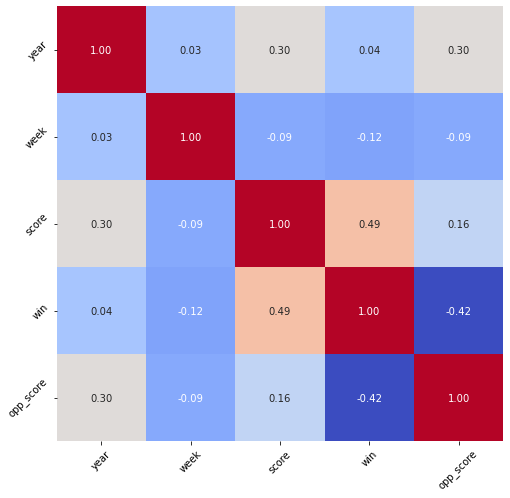

In [20]:
# run plot correlation matrix function
corr_matrix(data = df, print_flag = print_flag) if print_flag else corr_matrix(data = df
                                                                              ,file_name_flag = data_name_tuple[0]
                                                                              ,data_name_var = data_name_tuple[1]
                                                                              ,output_dir = output_dir
                                                                              )

In [8]:
# check for file name
if file_path:
    
    # check for print flag
    if print_flag:
        
        # run plot correlation matrix function
        corr_matrix(data = df, print_flag = print_flag)
            
    else:
            
        # set file name flag to True; needed to help create output file name
        file_name_flag = True

        # run plot correlation matrix function
        corr_matrix(data = df, file_name_flag = file_name_flag, data_name_var = file_name, output_dir = output_dir)
            
if db_path:
        
    # check for print flag
    if print_flag:
            
        # run plot correlation matrix function
        corr_matrix(data = df, print_flag = print_flag)
            
    else:
            
        # set file name flag to False; needed to help create output file name
        file_name_flag = False
        
        # run plot correlation matrix function
        corr_matrix(data = df, file_name_flag = file_name_flag, data_name_var = table_name, output_dir = output_dir)

## Explore Categorical Data <a id="section5"></a>

This section will review the following for each positional group:
* Row count
* Number of distinct values
* Minimum string length
* Maximum string length
* Percentage null
* Percentage empty
* Top n most frequent values
* First n values when sorted
* Last n values when sorted
<br><br/>

[Return to Top](#return)

In [23]:
# run data exploration function and pass it the categorical data exploration function
run_explore_func(data = df, func = explore_cat_data, print_flag = print_flag) if print_flag else run_explore_func(data = df
                                                                                                                 ,func = explore_cat_data
                                                                                                                 ,file_name_flag = data_name_tuple[0]
                                                                                                                 ,data_name_var = data_name_tuple[1]
                                                                                                                 ,output_dir = output_dir
                                                                                                                 )

In [9]:
# check for file name
if file_path:
    
    # check for print flag
    if print_flag:
            
        # run data exploration function
        run_explore_func(data = df, func = explore_cat_data, print_flag = print_flag)
            
    else:
            
        # set file name flag to True; needed to help create output file name
        file_name_flag = True

        # run data exploration function
        run_explore_func(data = df, func = explore_cat_data, file_name_flag = file_name_flag, data_name_var = file_name, output_dir = output_dir)
            
if db_path:
        
    # check for print flag
    if print_flag:
            
        # run data exploration function
        run_explore_func(data = df, func = explore_cat_data, print_flag = print_flag)
            
    else:
            
        # set file name flag to False; needed to help create output file name
        file_name_flag = False

        # run data exploration function
        run_explore_func(data = df, func = explore_cat_data, file_name_flag = file_name_flag, data_name_var = table_name, output_dir = output_dir)

### Explore Categorical Relationships <a id="section5a"></a>

This section will explore the relationships between each pair of categorical variables by running the following statistical tests:
* **Pearson's Chi-Squared Test of Independence**: determines whether there is an association between categorical variables (i.e., whether the variables are independent or related)
    * https://en.wikipedia.org/wiki/Chi-squared_test 
    * https://libguides.library.kent.edu/spss/chisquare  
* **Cramér's V**: measures an association between two categorical variables and is based on Pearson's chi-squared statistic
    * https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V#:~:text=In%20statistics%2C%20Cram%C3%A9r's%20V%20
    * https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
* **Theil's U**: measures a nominal association between two categorical variables and is based on the concept of information entropy
    * https://en.wikipedia.org/wiki/Uncertainty_coefficient
    * https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
<br><br/>

[Return to Top](#return)

In [14]:
# run categorical relationship function
run_cat_rel_func(data = df, print_flag = print_flag) if print_flag else run_cat_rel_func(data = df
                                                                                        ,file_name_flag = data_name_tuple[0]
                                                                                        ,data_name_var = data_name_tuple[1]
                                                                                        ,output_dir = output_dir
                                                                                        )

C:\Users\NADUVE~1\AppData\Local\Temp/ipykernel_27072/2195853095.py:55: RuntimeWarning: Rounded V = 1.0000000000000002 to 1.0. This is probably due to floating point precision issues.
  warnings.warn(f'Rounded V = {v} to {rounded_v}. This is probably due to floating point precision issues.',


In [10]:
# check for file name
if file_path:
    
    # check for print flag
    if print_flag:
            
        # run categorical relationship function
        run_cat_rel_func(data = df, print_flag = print_flag)
            
    else:
            
        # set file name flag to True; needed to help create output file name
        file_name_flag = True

        # run categorical relationship function
        run_cat_rel_func(data = df, file_name_flag = file_name_flag, data_name_var = file_name, output_dir = output_dir)
            
if db_path:
        
    # check for print flag
    if print_flag:
            
        # run categorical relationship function
        run_cat_rel_func(data = df, print_flag = print_flag)
            
    else:
            
        # set file name flag to False; needed to help create output file name
        file_name_flag = False

        # run categorical relationship function
        run_cat_rel_func(data = df, file_name_flag = file_name_flag, data_name_var = table_name, output_dir = output_dir)

C:\Users\NADUVE~1\AppData\Local\Temp/ipykernel_22148/2195853095.py:55: RuntimeWarning: Rounded V = 1.0000000000000002 to 1.0. This is probably due to floating point precision issues.
  warnings.warn(f'Rounded V = {v} to {rounded_v}. This is probably due to floating point precision issues.',


## Explore Numerical/Categorical Relationships <a id="section6"></a>

This section will explore the relationships between each pairwise group of numerical and categorical variables by running the following statistical test:
* **Correlation Ratio**: mathematically, it is defined as the weighted variance of the mean of each category divided by the variance of all samples; in human language, the Correlation Ratio answers the following question: Given a continuous number, how well can you know to which category it belongs? 
    * https://en.wikipedia.org/wiki/Correlation_ratio
    * https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9  

[Return to Top](#return)

In [24]:
# run categorical relationship function
run_corr_ratio_func(data = df, print_flag = print_flag) if print_flag else run_corr_ratio_func(data = df
                                                                                              ,file_name_flag = data_name_tuple[0]
                                                                                              ,data_name_var = data_name_tuple[1]
                                                                                              ,output_dir = output_dir
                                                                                              )

,x,y,corr_ratio
0,owner_team_name,year,0.008
1,owner_team_name,week,0.008
2,owner_team_name,score,0.197
3,owner_team_name,win,0.169
4,owner_team_name,opp_score,0.112
5,owner,year,0.008
6,owner,week,0.008
7,owner,score,0.197
8,owner,win,0.169
9,owner,opp_score,0.112


In [11]:
# check for file name
if file_path:
    
    # check for print flag
    if print_flag:
            
        # run categorical/numerical relationship function
        run_corr_ratio_func(data = df, print_flag = print_flag)
            
    else:
            
        # set file name flag to True; needed to help create output file name
        file_name_flag = True

        # run categorical/numerical relationship function
        run_corr_ratio_func(data = df, file_name_flag = file_name_flag, data_name_var = file_name, output_dir = output_dir)
            
if db_path:
        
    # check for print flag
    if print_flag:
            
        # run categorical/numerical relationship function
        run_corr_ratio_func(data = df, print_flag = print_flag)
            
    else:
            
        # set file name flag to False; needed to help create output file name
        file_name_flag = False

        # run categorical/numerical relationship function
        run_corr_ratio_func(data = df, file_name_flag = file_name_flag, data_name_var = table_name, output_dir = output_dir)

## Explore Date Distributions <a id="section7"></a>

This section will explore date distributions via a line plot.
<br><br/>

[Return to Top](#return)

In [25]:
# run categorical relationship function
plot_dates(data = df, print_flag = print_flag) if print_flag else plot_dates(data = df
                                                                            ,file_name_flag = data_name_tuple[0]
                                                                            ,data_name_var = data_name_tuple[1]
                                                                            ,output_dir = output_dir
                                                                            )

No dates.


In [12]:
# check for file name
if file_path:
    
    # check for print flag
    if print_flag:
            
        # run plot dates function
        plot_dates(data = df, print_flag = print_flag)
            
    else:
            
        # set file name flag to True; needed to help create output file name
        file_name_flag = True

        # run plot dates function
        plot_dates(data = df, file_name_flag = file_name_flag, data_name_var = file_name, output_dir = output_dir)
            
if db_path:
        
    # check for print flag
    if print_flag:
            
        # run plot dates function
        plot_dates(data = df, print_flag = print_flag)
            
    else:
            
        # set file name flag to False; needed to help create output file name
        file_name_flag = False

        # run plot dates function
        plot_dates(data = df, file_name_flag = file_name_flag, data_name_var = table_name, output_dir = output_dir)

No dates.
